In [29]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


# Section 1: Charger et préparer les données

In [30]:

# Charger les données
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Sélectionner les caractéristiques et la cible
X = data[["Gender", "Age", "Height", "SMOKE", "family_history_with_overweight", "FAVC", "MTRANS"]]
y = data["NObeyesdad"]

# Encoder les variables catégorielles
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_40801/2223794670.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_40801/2223794670.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
/var/folders/jm/vvjxp6h975z62bqbnn5lsbj00000gn/T/ipykernel_40801/2223794670.py:12: SettingWithCopyWarning: 
A value is trying to be se

# Section 2: Entraîner et évaluer le modèle

In [31]:
# Initialiser et entraîner le modèle de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.7092198581560284

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.79      0.77        56
      Normal_Weight       0.63      0.50      0.56        62
     Obesity_Type_I       0.76      0.69      0.72        78
    Obesity_Type_II       0.79      0.83      0.81        58
   Obesity_Type_III       0.89      0.94      0.91        63
 Overweight_Level_I       0.56      0.66      0.61        56
Overweight_Level_II       0.53      0.54      0.53        50

           accuracy                           0.71       423
          macro avg       0.70      0.71      0.70       423
       weighted avg       0.71      0.71      0.71       423



# Section 3: Optimisation des hyperparamètres

In [32]:
# Définir la grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur la grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Sauvegarder le meilleur modèle et les encodeurs
joblib.dump(best_model, 'best_random_forest_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}


['label_encoders.pkl']

# Section 4: Évaluer le meilleur modèle

In [33]:
# Faire des prédictions avec le meilleur modèle
best_predictions = best_model.predict(X_test)

# Évaluer les performances du meilleur modèle
print("Accuracy (meilleur modèle):", accuracy_score(y_test, best_predictions))
print("\nClassification Report (meilleur modèle):")
print(classification_report(y_test, best_predictions))

Accuracy (meilleur modèle): 0.7328605200945626

Classification Report (meilleur modèle):
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.77      0.77        56
      Normal_Weight       0.61      0.61      0.61        62
     Obesity_Type_I       0.79      0.72      0.75        78
    Obesity_Type_II       0.78      0.91      0.84        58
   Obesity_Type_III       0.88      0.97      0.92        63
 Overweight_Level_I       0.62      0.57      0.59        56
Overweight_Level_II       0.60      0.54      0.57        50

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.72       423
       weighted avg       0.73      0.73      0.73       423



# Section 5: Prédiction pour de nouvelles données avec le meilleur modèle

In [34]:
# Créer un dictionnaire pour les nouvelles données
new_data = {
    "Gender": ["Male"],  # Genre: Male
    "Age": [20],  # Âge: 20 ans
    "Height": [110],  # Taille (en cm): 110 cm
    "SMOKE": ["no"],  # Fumeur: Non
    "family_history_with_overweight": ["yes"],  # Antécédent familial d'obésité: Oui
    "FAVC": ["yes"],  # Fréquence de consommation de nourriture hypercalorique: Oui
    "MTRANS": ["Public_Transportation"]  # Mode de transport: Public_Transportation
}

# Créer un DataFrame à partir des nouvelles données
new_data_df = pd.DataFrame(new_data)

# Encoder les variables catégorielles
for column in new_data_df.select_dtypes(include=['object']).columns:
    new_data_df[column] = label_encoders[column].transform(new_data_df[column])

# Faire la prédiction avec le meilleur modèle
prediction = best_model.predict(new_data_df)

# Afficher la prédiction
print("Prédiction de l'obésité pour un homme de 20 ans, non-fumeur, une taille de 110 cm, un antécédent familial d'obésité, consommation fréquente de nourriture hypercalorique, et utilisant les transports publics:")
print("Niveau d'obésité prédit:", prediction[0])

Prédiction de l'obésité pour un homme de 20 ans, non-fumeur, une taille de 110 cm, un antécédent familial d'obésité, consommation fréquente de nourriture hypercalorique, et utilisant les transports publics:
Niveau d'obésité prédit: Obesity_Type_I


# Section 6: Visualisation des résultats

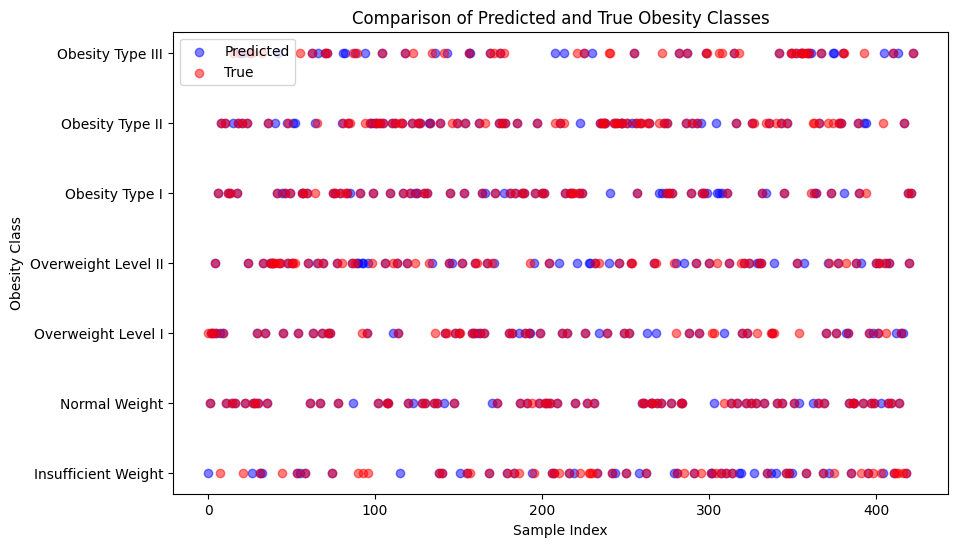

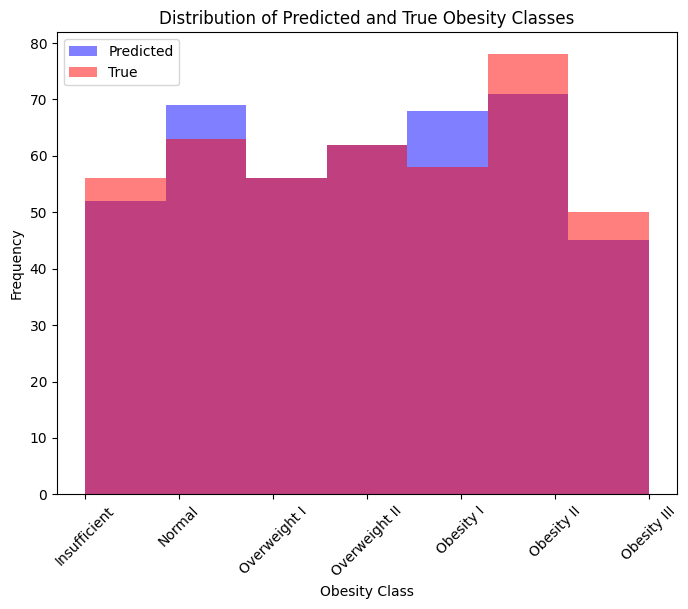

In [35]:

# Définir le mappage des classes pour une meilleure lisibilité
class_mapping = {0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Overweight Level I', 
                 3: 'Overweight Level II', 4: 'Obesity Type I', 5: 'Obesity Type II', 
                 6: 'Obesity Type III'}

# Comparaison des classes prédites et des vraies classes
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), best_predictions, color='blue', alpha=0.5, label='Predicted')
plt.scatter(np.arange(len(y_test)), y_test, color='red', alpha=0.5, label='True')
plt.xlabel('Sample Index')
plt.ylabel('Obesity Class')
plt.title('Comparison of Predicted and True Obesity Classes')
plt.legend(loc='upper left')
plt.yticks(np.arange(7), [class_mapping[i] for i in range(7)])
plt.show()

# Distribution des classes prédites et vraies
plt.figure(figsize=(8, 6))
plt.hist(best_predictions, bins=7, color='blue', alpha=0.5, label='Predicted')
plt.hist(y_test, bins=7, color='red', alpha=0.5, label='True')
plt.xlabel('Obesity Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted and True Obesity Classes')
plt.xticks(range(7), ['Insufficient', 'Normal', 'Overweight I', 'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'], rotation=45)
plt.legend()
plt.show()